In [15]:
from keras.utils import np_utils
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
import tensorflow as tf
# Checking GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


The data is divided into folders were each folder corresponds to a patient.

In [14]:
# Path to data
path = "./Data/IDC_regular_ps50_idx5"
# Identify data folders
folders = [folder for folder in os.listdir(path)]

print("Number of patients: %d" %len(folders))

Number of patients: 279


Let's look to an image and its shape:

Image shape: (50, 50, 3)


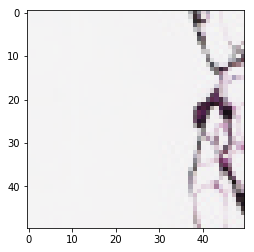

In [136]:
img = cv2.imread(path + '/' + '10264' + '/' + '0' + '/' + '10264_idx5_x51_y1651_class0.png')
# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("Image shape: {}".format(img.shape))

Function to load the images:

In [157]:
def path_to_tensor(img_path):
    # load images
    img = cv2.imread(img_path)
    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.shape == (50, 50, 3):
        # convert 3D tensor to 4D tensor with shape (1, 50, 50, 3) and return 4D tensor
        #return np.expand_dims(img, axis=0)
        return img

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


Each patient's folder contains two folders: a folder with non cancer images and a folder with cancerous tissue images.

In [158]:
# Healthy tissue is on folder 0 and cancerous tissue in folder 1
folder_label = ['0', '1']
images = []
labels = []

for folder in folders:
    # Read from folder 0 and create corresponding label array
    path_0 = path + '/' + folder + '/' + folder_label[0]
    images_0 = [path_to_tensor(path_0 + '/' + img_path) for img_path in os.listdir(path_0)]
    labels_0 = np.zeros(len(images_0), dtype=np.int8)
    images.extend(images_0)
    labels.extend(labels_0)
    # Read from folder 1 and create corresponding label array
    path_1 = path + '/' + folder + '/' + folder_label[1]
    images_1 = [path_to_tensor(path_1 + '/' + img_path) for img_path in os.listdir(path_1)]
    labels_1 = np.ones(len(images_1), dtype=np.int8)
    images.extend(images_1)
    labels.extend(labels_1)    

Number of images: 277524
Number of labels: 277524


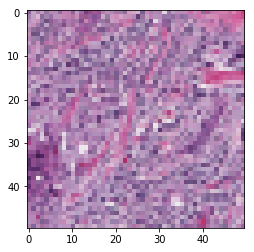

In [159]:
images = np.array(images)
labels = np.array(labels)
print("Number of images: {}".format(len(images)))
print("Number of labels: {}".format(len(labels)))

_ = plt.imshow(images[0])

Let's divide the patients bewteen a training set, validation set. 90% of the patients are held for training, 10% are assigned for testing and the remaining are kept for validation.   

In [160]:
# Seed for random functions
np.random.seed(42)